In [19]:
# -*- encoding: utf-8 -*-

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [20]:
#Carregando a base de dados
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, '4')

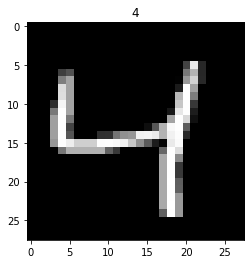

In [21]:
#Visualizando algumas imagens
plt.imshow(x_treinamento[2], cmap = 'gray')
plt.title(y_treinamento[2])

In [22]:
#Preprocessando os dados para ajustes dos valores, multiplicando o tamanho da imagem 28*28=748, uint8 para float,
#basicamente nomalizando a base
x_treinamento = x_treinamento.reshape((len(x_treinamento), np.prod(x_treinamento.shape[1:])))
x_teste = x_teste.reshape((len(x_teste), np.prod(x_teste.shape[1:])))
x_treinamento = x_treinamento.astype('float32')
x_teste = x_teste.astype('float32')
x_treinamento /= 255
x_teste /= 255
#Já que se tem mais de 10 classes de saída
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [23]:
#Criand a Deep Learn
modelo = Sequential()
modelo.add(Dense(units=64, activation = 'relu', input_dim=784))
#Tentando evitar overfitting
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 10, activation = 'softmax'))


In [24]:
#Vendo detalhes da rede
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [25]:
#Compilando a rede
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [26]:
#Treinando a rede
historico = modelo.fit(x_treinamento, y_treinamento, epochs =20, validation_data = (x_teste, y_teste))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.4482 - accuracy: 0.8637 - val_loss: 0.1765 - val_accuracy: 0.9478
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2291 - accuracy: 0.9344 - val_loss: 0.1438 - val_accuracy: 0.9576
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1917 - accuracy: 0.9449 - val_loss: 0.1250 - val_accuracy: 0.9625
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1650 - accuracy: 0.9526 - val_loss: 0.1168 - val_accuracy: 0.9662
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1524 - accuracy: 0.9551 - val_loss: 0.1045 - val_accuracy: 0.9706
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1396 - accuracy: 0.9591 - val_loss: 0.0989 - val_accuracy: 0.9709
Epoch 7/20
60000/600

In [28]:
#Vendo informações do treinamento
historico.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

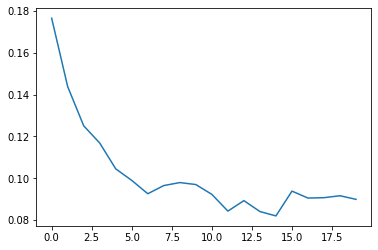

In [29]:
plt.plot(historico.history['val_loss'])


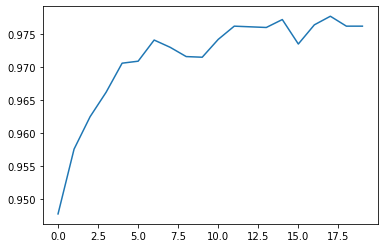

In [31]:
plt.plot(historico.history['val_accuracy'])

In [33]:
#criando as previsões usando o modelo treinado e visualizando
previsoes = modelo.predict(x_teste)
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)

In [34]:
confusao

array([[ 971,    0,    1,    2,    1,    2,    1,    1,    1,    0],
       [   0, 1122,    2,    2,    0,    1,    1,    1,    6,    0],
       [   3,    1, 1009,    8,    3,    0,    1,    6,    1,    0],
       [   0,    0,    2,  994,    0,    3,    0,    6,    4,    1],
       [   0,    0,    3,    0,  960,    0,    7,    3,    0,    9],
       [   2,    1,    0,   16,    1,  865,    1,    0,    3,    3],
       [   3,    3,    0,    0,    7,   10,  933,    0,    2,    0],
       [   3,    3,    9,    6,    0,    0,    0, 1002,    0,    5],
       [   4,    1,    2,    5,    6,    9,    2,    3,  939,    3],
       [   4,    3,    0,    6,   17,    2,    0,    5,    5,  967]])

In [35]:
#Testando uma previsao
y_treinamento[20]
x_treinamento[20]
novo = x_treinamento[20]
novo = np.expand_dims(novo, axis = 0)
pred = modelo.predict(novo)

In [36]:
pred

array([[1.2879365e-13, 3.7315620e-13, 9.1293681e-11, 2.2454245e-16,
        1.0000000e+00, 1.1075893e-12, 5.9660624e-11, 1.8005023e-12,
        1.4499148e-13, 2.0360828e-10]], dtype=float32)